# **Imports**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install fasttext

In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.


In [ ]:
!pip install gensim

In [ ]:
!pip uninstall numpy -y
!pip uninstall gensim -y
!pip install numpy==1.25.2
!pip install gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
import fasttext
from transformers import AutoTokenizer, AutoModel
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder



import torch
from transformers import BertTokenizer, BertModel



# **Show Data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/preprocessed_df_New.csv')
df

,name_ar,question_body_1
0,0,"['خوف', 'شديد', 'مبلغ', 'ايض', 'أصبح', 'عصبي',..."
1,0,"['مدمن', 'قمار', 'مدمن', 'تداول', 'مال', 'نفسي..."
2,0,"['سرع', 'انفعال', 'غضب', 'حال', 'نرفزه']"
3,0,"['مشكل', 'نوم', 'انام', 'مد', 'اضل', 'مستيقض',..."
4,0,"['وسواس', 'حمل']"
...,...,...
60400,4,"['والد', 'مع', 'ضغط', 'عين', 'طبيعي', 'ام']"
60401,4,"['استفسار', 'صح', 'دوا', 'مذكور', 'دنا', 'مدى'..."
60402,4,"['عندى', 'ارتفاع', 'عين', 'يمني', 'مستوي', 'كا..."
60403,4,"['عين', 'حمز', 'وجعاني']"


In [ ]:
import ast
df['question_body_1'] = df['question_body_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#**Traditional** Methods

## Skip-Gram

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

vector_sizes = [100, 200, 300]
windows = [2, 3, 5]
min_counts = [1, 2]

best_f1 = 0
best_params = None

for vector_size in vector_sizes:
    for window in windows:
        for min_count in min_counts:
            print(f"\nTraining Word2Vec with vector_size={vector_size}, window={window}, min_count={min_count}")

            sg = Word2Vec(sentences=df['question_body_1'], vector_size=vector_size, window=window, min_count=min_count, sg=1)

            sg_embedding = []
            for sentence in df['question_body_1']:
                vectors = [sg.wv[word] for word in sentence if word in sg.wv]
                if len(vectors) > 0:
                    sentence_vector = np.mean(vectors, axis=0)
                else:
                    sentence_vector = np.zeros(vector_size)
                sg_embedding.append(sentence_vector)
            sg_embedding = np.array(sg_embedding)

            X_train, X_test, y_train, y_test = train_test_split(sg_embedding, df['name_ar'], test_size=0.2, random_state=42)

            nb_model = GaussianNB()
            nb_model.fit(X_train, y_train)
            y_pred_sg = nb_model.predict(X_test)

            print("Classification Report:")
            report = classification_report(y_test, y_pred_sg, output_dict=True)
            print(classification_report(y_test, y_pred_sg))

            f1_score = report['weighted avg']['f1-score']
            if f1_score > best_f1:
                best_f1 = f1_score
                best_params = (vector_size, window, min_count)

print("\nBest configuration:")
print(f"vector_size={best_params[0]}, window={best_params[1]}, min_count={best_params[2]} with F1={best_f1:.4f}")



Training Word2Vec with vector_size=100, window=2, min_count=1
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      2418
           1       0.78      0.75      0.76      2386
           2       0.72      0.67      0.69      2447
           3       0.70      0.70      0.70      2406
           4       0.72      0.68      0.70      2424

    accuracy                           0.72     12081
   macro avg       0.72      0.72      0.72     12081
weighted avg       0.72      0.72      0.72     12081


Training Word2Vec with vector_size=100, window=2, min_count=2
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2418
           1       0.80      0.76      0.78      2386
           2       0.76      0.73      0.74      2447
           3       0.77      0.73      0.75      2406
           4       0.77      0.73      0.75      2424

    accuracy 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

sg = Word2Vec(sentences = df['question_body_1'], vector_size=100, window=5, min_count=2 , sg = 1)


all_words = [word for sentence in df['question_body_1'] for word in sentence]
word_embedding_sg = {}

for word in all_words:
    if word in sg.wv:
        word_embedding_sg[word] = sg.wv[word]


sg_embedding = []

for sentence in df['question_body_1']:
    vectors = [sg.wv[word] for word in sentence if word in sg.wv]
    if len(vectors) > 0:
        sentence_vector = np.mean(vectors, axis=0)
    else:
        sentence_vector = np.zeros(sg.vector_size)
    sg_embedding.append(sentence_vector)

sg_embedding = np.array(sg_embedding)

### NaiveBayes SkipGram

In [ ]:
best_hyperparameters =[]

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(sg_embedding, df['name_ar'], test_size=0.2, random_state=42)


param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb,cv=5, scoring='accuracy', verbose=1, return_train_score=True)

grid_search_nb.fit(X_train, y_train)

cv_results_nb = grid_search_nb.cv_results_

rows_nb_sg = []
for i in range(len(cv_results_nb['params'])):
    rows_nb_sg.append({
        'Model': 'GaussianNB SG',
        'Hyperparameters': cv_results_nb['params'][i],
        'Std Accuracy': cv_results_nb['std_test_score'][i],
        'mean_test_score': cv_results_nb['mean_test_score'][i],
        'Train Accuracy': cv_results_nb['mean_train_score'][i]
    })

best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for GNB: {best_params_nb}")

best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train, y_train)

y_pred_nb = best_nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb, average='macro')
pre_nb = precision_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print("Classification Report for Best GNB Model:")
print(classification_report(y_test, y_pred_nb))

best_hyperparameters = [{
    'Model': 'GaussianNB SG',
    'Hyperparameters': best_params_nb,
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': rec_nb,
    'F1 Score': f1_nb
}]


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for GNB: {'var_smoothing': 1e-09}
Classification Report for Best GNB Model:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2418
           1       0.84      0.81      0.82      2386
           2       0.78      0.79      0.78      2447
           3       0.83      0.79      0.81      2406
           4       0.82      0.76      0.79      2424

    accuracy                           0.80     12081
   macro avg       0.80      0.80      0.80     12081
weighted avg       0.80      0.80      0.80     12081



In [ ]:
x = pd.DataFrame(rows_nb_sg)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,GaussianNB SG,{'var_smoothing': 1e-09},0.003624,0.80041,0.80042
1,GaussianNB SG,{'var_smoothing': 1e-08},0.003624,0.80041,0.80042
2,GaussianNB SG,{'var_smoothing': 1e-07},0.003624,0.80041,0.80042
3,GaussianNB SG,{'var_smoothing': 1e-06},0.003624,0.80041,0.80042
4,GaussianNB SG,{'var_smoothing': 1e-05},0.003624,0.80041,0.80042


### Logestic Regression SG

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(sg_embedding, df['name_ar'], test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [5000]
}



lr = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
grid_search_lr.fit(X_train, y_train)

cv_results_lr = grid_search_lr.cv_results_

rows_lr_sg = []
for i in range(len(cv_results_lr['params'])):
    rows_lr_sg.append({
        'Model': 'LogisticRegression SG',
        'Hyperparameters': cv_results_lr['params'][i],
        'Std Accuracy': cv_results_lr['std_test_score'][i],
        'mean_test_score': cv_results_lr['mean_test_score'][i],
        'Train Accuracy': cv_results_lr['mean_train_score'][i]
    })

best_params_lr = grid_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")

best_lr = LogisticRegression(**best_params_lr)
best_lr.fit(X_train, y_train)

y_pred_lr = best_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
pre_lr = precision_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

best_hyperparameters_lr = [{
    'Model': 'LogisticRegression SG',
    'Hyperparameters': best_params_lr,
    'Accuracy': acc_lr,
    'Precision': pre_lr,
    'Recall': rec_lr,
    'F1 Score': f1_lr
}]


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2418
           1       0.87      0.86      0.86      2386
           2       0.85      0.85      0.85      2447
           3       0.90      0.87      0.89      2406
           4       0.90      0.84      0.87      2424

    accuracy                           0.86     12081
   macro avg       0.86      0.86      0.86     12081
weighted avg       0.86      0.86      0.86     12081



In [ ]:
x = pd.DataFrame(rows_lr_sg)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,LogisticRegression SG,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l2',...",0.003378,0.837886,0.838295
1,LogisticRegression SG,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l2',...",0.003336,0.837824,0.838243
2,LogisticRegression SG,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', ...",0.002659,0.852909,0.854508
3,LogisticRegression SG,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', ...",0.002576,0.852847,0.854348
4,LogisticRegression SG,"{'C': 1, 'max_iter': 5000, 'penalty': 'l2', 's...",0.002840,0.858186,0.860525
5,LogisticRegression SG,"{'C': 1, 'max_iter': 5000, 'penalty': 'l2', 's...",0.002821,0.858166,0.860871
6,LogisticRegression SG,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.003074,0.858517,0.861880
7,LogisticRegression SG,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.002816,0.859262,0.862180


### RNN

In [ ]:
from collections import Counter
from tensorflow.keras.utils import to_categorical


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['question_body_1'])

X_seq = tokenizer.texts_to_sequences(df['question_body_1'])


max_sequence_length = max(len(seq) for seq in X_seq)
print(max_sequence_length)

X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)
print(X_padded[0])

word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ", vocab_size)


embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))


for word, i in word_index.items():
    if i < vocab_size and word in sg.wv:
        embedding_matrix[i] = sg.wv[word]


y = to_categorical(df['name_ar'])
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)




74
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   64    5 1671  417  234  309   61  434  420 3177  291 1048
  553 3072   25    6]
Vocab Size:  28296


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from keras.layers import  Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length, trainable=True))


model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train,epochs=10,validation_split=0.2,batch_size=64, callbacks=[early_stopping])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     2,829,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,829,600 (10.79 MB)

 Trainable params: 2,829,600 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5379 - loss: 1.2520 - val_accuracy: 0.8492 - val_loss: 0.4502
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8608 - loss: 0.4624 - val_accuracy: 0.8776 - val_loss: 0.3880
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8968 - loss: 0.3565 - val_accuracy: 0.8547 - val_loss: 0.4491
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8961 - loss: 0.3550 - val_accuracy: 0.8852 - val_loss: 0.3584
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9248 - loss: 0.2672 - val_accuracy: 0.8864 - val_loss: 0.4045
Epoch 6/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9284 - loss: 0.2485 - val_accuracy: 0.8670 - val_loss: 0.4883
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8915 - loss: 0.3469
Test Accuracy: 0.8900


### LSTM

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=128, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │     9,967,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,967,500 (38.02 MB)

 Trainable params: 9,967,500 (38.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 350s 868ms/step - accuracy: 0.7311 - loss: 0.7610 - val_accuracy: 0.8869 - val_loss: 0.3514
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 361s 814ms/step - accuracy: 0.9048 - loss: 0.3235 - val_accuracy: 0.8980 - val_loss: 0.3279
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 380s 812ms/step - accuracy: 0.9256 - loss: 0.2569 - val_accuracy: 0.9028 - val_loss: 0.3243
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 321s 812ms/step - accuracy: 0.9375 - loss: 0.2169 - val_accuracy: 0.9037 - val_loss: 0.3341
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 322s 810ms/step - accuracy: 0.9457 - loss: 0.1895 - val_accuracy: 0.8912 - val_loss: 0.4233
495/495 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9102 - loss: 0.3048
Test Accuracy: 0.9068


## CBOW

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

vector_sizes = [100, 200, 300]
windows = [2, 3, 5]
min_counts = [1, 2]

best_f1 = 0
best_params = None

for vector_size in vector_sizes:
    for window in windows:
        for min_count in min_counts:
            print(f"\nTraining Word2Vec CBOW with vector_size={vector_size}, window={window}, min_count={min_count}")

            CBOW_model = Word2Vec(sentences=df['question_body_1'], vector_size=vector_size, window=window, min_count=min_count, sg=0)

            CBOW_embedding = []
            for sentence in df['question_body_1']:
                vectors = [CBOW_model.wv[word] for word in sentence if word in CBOW_model.wv]
                if len(vectors) > 0:
                    sentence_vector = np.mean(vectors, axis=0)
                else:
                    sentence_vector = np.zeros(vector_size)
                CBOW_embedding.append(sentence_vector)
            CBOW_embedding = np.array(CBOW_embedding)

            X_train, X_test, y_train, y_test = train_test_split(CBOW_embedding, df['name_ar'], test_size=0.2, random_state=42)

            nb_model = GaussianNB()
            nb_model.fit(X_train, y_train)
            y_pred_CBOW = nb_model.predict(X_test)

            print("Classification Report:")
            report = classification_report(y_test, y_pred_CBOW, output_dict=True)
            print(classification_report(y_test, y_pred_CBOW))

            f1_score = report['weighted avg']['f1-score']
            if f1_score > best_f1:
                best_f1 = f1_score
                best_params = (vector_size, window, min_count)

print("\nBest Parameters for CBOW:")
print(f"vector_size={best_params[0]}, window={best_params[1]}, min_count={best_params[2]} with F1={best_f1:.4f}")



Training Word2Vec CBOW with vector_size=100, window=2, min_count=1
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      3270
           1       0.78      0.80      0.79      2427
           2       0.85      0.84      0.85      4541
           3       0.91      0.83      0.87      3433
           4       0.90      0.79      0.84      2866

    accuracy                           0.83     16537
   macro avg       0.83      0.82      0.83     16537
weighted avg       0.84      0.83      0.83     16537


Training Word2Vec CBOW with vector_size=100, window=2, min_count=2
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      3270
           1       0.79      0.79      0.79      2427
           2       0.86      0.84      0.85      4541
           3       0.91      0.84      0.87      3433
           4       0.91      0.79      0.85      2866

   

In [ ]:
CBOW_model= Word2Vec(sentences=df['question_body_1'], vector_size=300, window=5, min_count=2 , sg = 0)
word_embedding_CBOW = {}

for word in all_words:
    if word in CBOW_model.wv:
        word_embedding_CBOW[word] = CBOW_model.wv[word]



from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

CBOW_embedding = []
for sentence in df['question_body_1']:
    vectors = [CBOW_model.wv[word] for word in sentence if word in CBOW_model.wv]
    if vectors:
        sentence_vector = np.mean(vectors, axis=0)
    else:
        sentence_vector = np.zeros(CBOW_model.vector_size)
    CBOW_embedding.append(sentence_vector)

CBOW_embedding = np.array(CBOW_embedding)

### Naive Bayes CBOW

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(CBOW_embedding, df['name_ar'], test_size=0.2, random_state=42)


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


gnb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid,cv=5, scoring='accuracy', verbose=1, return_train_score=True)


grid_search_nb.fit(X_train, y_train)
cv_results_nb = grid_search_nb.cv_results_


rows_nb_CBOW = []
for i in range(len(cv_results_nb['params'])):
    rows_nb_CBOW.append({
        'Model': 'GaussianNB CBOW',
        'Hyperparameters': cv_results_nb['params'][i],
        'Std Accuracy': cv_results_nb['std_test_score'][i],
        'mean_test_score': cv_results_nb['mean_test_score'][i],
        'Train Accuracy': cv_results_nb['mean_train_score'][i]
    })

best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for GNB: {best_params_nb}")


best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train, y_train)

y_pred_nb = best_nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb, average='macro')
pre_nb = precision_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print("Classification Report for Best GNB Model:")
print(classification_report(y_test, y_pred_nb))

best_hyperparameters = [{
    'Model': 'GaussianNB CBOW',
    'Hyperparameters': best_params_nb,
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': rec_nb,
    'F1 Score': f1_nb
}]


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for GNB: {'var_smoothing': 1e-09}
Classification Report for Best GNB Model:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      3226
           1       0.82      0.78      0.80      2345
           2       0.88      0.84      0.86      4350
           3       0.90      0.84      0.87      3217
           4       0.92      0.82      0.87      2701

    accuracy                           0.84     15839
   macro avg       0.85      0.83      0.84     15839
weighted avg       0.85      0.84      0.84     15839



In [ ]:
x = pd.DataFrame(rows_nb_CBOW)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,GaussianNB CBOW,{'var_smoothing': 1e-09},0.002778,0.840181,0.840568
1,GaussianNB CBOW,{'var_smoothing': 1e-08},0.002778,0.840181,0.840568
2,GaussianNB CBOW,{'var_smoothing': 1e-07},0.002778,0.840181,0.840568
3,GaussianNB CBOW,{'var_smoothing': 1e-06},0.002778,0.840181,0.840568
4,GaussianNB CBOW,{'var_smoothing': 1e-05},0.002778,0.840181,0.840568


### Logestic Regression CBOW

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(CBOW_embedding, df['name_ar'], test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000, 3000]
}



lr = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
grid_search_lr.fit(X_train, y_train)

cv_results_lr = grid_search_lr.cv_results_

rows_lr_CBOW = []
for i in range(len(cv_results_lr['params'])):
    rows_lr_CBOW.append({
        'Model': 'LogisticRegression SG',
        'Hyperparameters': cv_results_lr['params'][i],
        'Std Accuracy': cv_results_lr['std_test_score'][i],
        'mean_test_score': cv_results_lr['mean_test_score'][i],
        'Train Accuracy': cv_results_lr['mean_train_score'][i]
    })

best_params = grid_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params}")


best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train, y_train)

y_pred_lr = best_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
pre_lr = precision_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

best_hyperparameters.append({'Model': 'LR CBOW',
               "Hyperparameters": best_params,
               "Accuracy": acc_lr,
               "Precision": rec_lr,
               "Recall": pre_lr,
               "F1 Score": f1_lr})

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3226
           1       0.89      0.82      0.86      2345
           2       0.90      0.91      0.90      4350
           3       0.94      0.91      0.92      3217
           4       0.93      0.89      0.91      2701

    accuracy                           0.89     15839
   macro avg       0.89      0.88      0.89     15839
weighted avg       0.89      0.89      0.89     15839



In [ ]:
rows_lr_CBOW

[{'Model': 'LogisticRegression SG',
  'Hyperparameters': {'C': 0.01,
   'max_iter': 1000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'Std Accuracy': 0.0034307066925512997,
  'mean_test_score': 0.8781904624453343,
  'Train Accuracy': 0.8786048004720378},
 {'Model': 'LogisticRegression SG',
  'Hyperparameters': {'C': 0.01,
   'max_iter': 3000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'Std Accuracy': 0.0034307066925512997,
  'mean_test_score': 0.8781904624453343,
  'Train Accuracy': 0.8786048004720378},
 {'Model': 'LogisticRegression SG',
  'Hyperparameters': {'C': 0.1,
   'max_iter': 1000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'Std Accuracy': 0.003036013746723738,
  'mean_test_score': 0.8823418171380784,
  'Train Accuracy': 0.8833480668043977},
 {'Model': 'LogisticRegression SG',
  'Hyperparameters': {'C': 0.1,
   'max_iter': 3000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'Std Accuracy': 0.003036013746723738,
  'mean_test_score': 0.8823418171380784,
  'Train Accuracy': 0

### RNN

In [ ]:

from collections import Counter
from tensorflow.keras.utils import to_categorical


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['question_body_1'])

X_seq = tokenizer.texts_to_sequences(df['question_body_1'])


max_sequence_length = max(len(seq) for seq in X_seq)
print(max_sequence_length)

X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)
print(X_padded[0])

word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ", vocab_size)


embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size and word in CBOW_model.wv:
        embedding_matrix[i] = CBOW_model.wv[word]


y = to_categorical(df['name_ar'])
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)




74
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   64    5 1671  417  234  309   61  434  420 3177  291 1048
  553 3072   25    6]
Vocab Size:  28296


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from keras.layers import  Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length, trainable=True))


model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train,epochs=10,validation_split=0.2,batch_size=64, callbacks=[early_stopping])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │     8,488,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,488,800 (32.38 MB)

 Trainable params: 8,488,800 (32.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5070 - loss: 1.3298 - val_accuracy: 0.8514 - val_loss: 0.4790
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8520 - loss: 0.4894 - val_accuracy: 0.8547 - val_loss: 0.4667
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8910 - loss: 0.3730 - val_accuracy: 0.8811 - val_loss: 0.3941
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8979 - loss: 0.3497 - val_accuracy: 0.8836 - val_loss: 0.4152
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9195 - loss: 0.2800 - val_accuracy: 0.8675 - val_loss: 0.4023
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8875 - loss: 0.3750
Test Accuracy: 0.8855


### LSTM

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())



model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, callbacks=[early_stopping])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │     8,488,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,488,800 (32.38 MB)

 Trainable params: 8,488,800 (32.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.6094 - loss: 1.0456 - val_accuracy: 0.8560 - val_loss: 0.4829
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8835 - loss: 0.3960 - val_accuracy: 0.8833 - val_loss: 0.3738
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9160 - loss: 0.2923 - val_accuracy: 0.8892 - val_loss: 0.3575
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9320 - loss: 0.2338 - val_accuracy: 0.8868 - val_loss: 0.3806
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9428 - loss: 0.2017 - val_accuracy: 0.8719 - val_loss: 0.4940
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8914 - loss: 0.3467
Test Accuracy: 0.8904


# **Pretrained Models**

## Fast Text

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz

--2025-05-25 07:51:09--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.33, 3.171.22.68, 3.171.22.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4500982519 (4.2G) [application/octet-stream]
Saving to: ‘cc.ar.300.bin.gz’

cc.ar.300.bin.gz    100%[===================>]   4.19G   367MB/s    in 12s     

2025-05-25 07:51:21 (366 MB/s) - ‘cc.ar.300.bin.gz’ saved [4500982519/4500982519]



In [ ]:
!gunzip cc.ar.300.bin.gz

In [ ]:
model_fastText = fasttext.load_model('cc.ar.300.bin')

In [ ]:
def get_fasttext_embeddings(tokens):
    return [model_fastText.get_word_vector(token) for token in tokens]

fasttext_embeddings = [get_fasttext_embeddings(doc) for doc in df['question_body_1']]

### Naive Bayes Fast Text

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def get_sentence_embedding(token_vectors):
    return np.mean(token_vectors, axis=0) if token_vectors else np.zeros(300)


X = np.array([get_sentence_embedding(vecs) for vecs in fasttext_embeddings])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['name_ar'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


gnb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid,cv=5, scoring='accuracy', verbose=1, return_train_score=True)


grid_search_nb.fit(X_train, y_train)
cv_results_nb = grid_search_nb.cv_results_


rows_nb_FastText = []
for i in range(len(cv_results_nb['params'])):
    rows_nb_FastText.append({
        'Model': 'GaussianNB Fast Text',
        'Hyperparameters': cv_results_nb['params'][i],
        'Std Accuracy': cv_results_nb['std_test_score'][i],
        'mean_test_score': cv_results_nb['mean_test_score'][i],
        'Train Accuracy': cv_results_nb['mean_train_score'][i]
    })

best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for GNB: {best_params_nb}")


best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train, y_train)

y_pred_nb = best_nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb, average='macro')
pre_nb = precision_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print("Classification Report for Best GNB Model:")
print(classification_report(y_test, y_pred_nb))

best_hyperparameters = [{
    'Model': 'GaussianNB Fast Text',
    'Hyperparameters': best_params_nb,
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': rec_nb,
    'F1 Score': f1_nb
}]


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for GNB: {'var_smoothing': 1e-09}
Classification Report for Best GNB Model:
              precision    recall  f1-score   support

           0       0.48      0.85      0.62      3226
           1       0.82      0.59      0.69      2345
           2       0.80      0.67      0.73      4350
           3       0.67      0.51      0.58      3217
           4       0.82      0.72      0.76      2701

    accuracy                           0.67     15839
   macro avg       0.72      0.67      0.68     15839
weighted avg       0.71      0.67      0.68     15839



In [ ]:
x = pd.DataFrame(rows_nb_FastText)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,GaussianNB Fast Text,{'var_smoothing': 1e-09},0.002094,0.669345,0.670221
1,GaussianNB Fast Text,{'var_smoothing': 1e-08},0.002094,0.669345,0.670221
2,GaussianNB Fast Text,{'var_smoothing': 1e-07},0.002094,0.669345,0.670221
3,GaussianNB Fast Text,{'var_smoothing': 1e-06},0.002094,0.669345,0.670221
4,GaussianNB Fast Text,{'var_smoothing': 1e-05},0.002094,0.669345,0.670221


### Logestic Regression Fastext

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def get_sentence_embedding(token_vectors):
    return np.mean(token_vectors, axis=0) if token_vectors else np.zeros(300)

X_fasttext = np.array([get_sentence_embedding(vecs) for vecs in fasttext_embeddings])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['name_ar'])


X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

best_hyperparameters = []

param_grid_lr = {
    'C': [1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000, 3000]
}


lr = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, return_train_score=True,  n_jobs=1)
grid_search_lr.fit(X_train, y_train)


cv_results_lr = grid_search_lr.cv_results_
rows_lr_fasttext = []

for i in range(len(cv_results_lr['params'])):
    rows_lr_fasttext.append({
        'Model': 'LogisticRegression FastText',
        'Hyperparameters': cv_results_lr['params'][i],
        'Std Accuracy': cv_results_lr['std_test_score'][i],
        'mean_test_score': cv_results_lr['mean_test_score'][i],
        'Train Accuracy': cv_results_lr['mean_train_score'][i]
    })


best_params_lr = grid_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")

best_lr = LogisticRegression(**best_params_lr)
best_lr.fit(X_train, y_train)


y_pred_lr = best_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
pre_lr = precision_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr, target_names=[str(cls) for cls in label_encoder.classes_]))

best_hyperparameters.append({
    'Model': 'LogisticRegression FastText',
    "Hyperparameters": best_params_lr,
    "Accuracy": acc_lr,
    "Precision": rec_lr,
    "Recall": rec_lr,
    "F1 Score": f1_lr
})


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3226
           1       0.88      0.83      0.85      2345
           2       0.86      0.90      0.88      4350
           3       0.90      0.89      0.90      3217
           4       0.92      0.87      0.89      2701

    accuracy                           0.87     15839
   macro avg       0.88      0.87      0.87     15839
weighted avg       0.87      0.87      0.87     15839



In [ ]:
x = pd.DataFrame(rows_lr_fasttext)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,LogisticRegression FastText,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",0.001217,0.867504,0.872425
1,LogisticRegression FastText,"{'C': 1, 'max_iter': 3000, 'penalty': 'l2', 's...",0.001217,0.867504,0.872425
2,LogisticRegression FastText,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.002013,0.869667,0.875783
3,LogisticRegression FastText,"{'C': 10, 'max_iter': 3000, 'penalty': 'l2', '...",0.002013,0.869667,0.875783


### RNN Model FastText

In [ ]:

from collections import Counter
from tensorflow.keras.utils import to_categorical

texts = [' '.join(tokens) for tokens in df['question_body_1']]


tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

X_seq = tokenizer.texts_to_sequences(texts)


max_sequence_length = max(len(seq) for seq in X_seq)
print(max_sequence_length)

X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)
print(X_padded[0])

word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ", vocab_size)


embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in model_fastText:
        embedding_matrix[i] = model_fastText.get_word_vector(word)


y = to_categorical(df['name_ar'])
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)




74
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 67  1]
Vocab Size:  30551


In [ ]:
print(X_train.shape)
print(y_train.shape)

(63353, 74)
(63353, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from keras.layers import  Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length, trainable=True))

model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train,epochs=10,validation_split=0.2,batch_size=64, callbacks=[early_stopping])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     9,165,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,165,300 (34.96 MB)

 Trainable params: 9,165,300 (34.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 185s 227ms/step - accuracy: 0.5743 - loss: 1.1918 - val_accuracy: 0.8623 - val_loss: 0.4575
Epoch 2/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 180s 227ms/step - accuracy: 0.8981 - loss: 0.3498 - val_accuracy: 0.8805 - val_loss: 0.3879
Epoch 3/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 178s 224ms/step - accuracy: 0.9226 - loss: 0.2761 - val_accuracy: 0.8794 - val_loss: 0.4032
Epoch 4/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 202s 224ms/step - accuracy: 0.9290 - loss: 0.2464 - val_accuracy: 0.8763 - val_loss: 0.4362
495/495 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8827 - loss: 0.3838
Test Accuracy: 0.8818


### LSTM FastText

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=max_sequence_length))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     9,165,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,165,300 (34.96 MB)

 Trainable params: 9,165,300 (34.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 429s 532ms/step - accuracy: 0.7132 - loss: 0.8150 - val_accuracy: 0.8534 - val_loss: 0.4707
Epoch 2/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 436s 525ms/step - accuracy: 0.9084 - loss: 0.3161 - val_accuracy: 0.8967 - val_loss: 0.3381
Epoch 3/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 427s 507ms/step - accuracy: 0.9280 - loss: 0.2494 - val_accuracy: 0.8785 - val_loss: 0.4522
Epoch 4/10
792/792 ━━━━━━━━━━━━━━━━━━━━ 420s 530ms/step - accuracy: 0.9404 - loss: 0.2072 - val_accuracy: 0.8920 - val_loss: 0.3958
495/495 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.9025 - loss: 0.3161
Test Accuracy: 0.9002


## **Arab Bert**

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv02").to(device)
print(device)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

cuda


In [ ]:
texts = df['question_body_1'].apply(lambda x: ' '.join(x)).tolist()


In [ ]:
token_lengths = [len(tokenizer(text, truncation=False)['input_ids']) for text in texts]
max_len = max(token_lengths)

print(f"Max tokenized length: {max_len}")

avg_len = sum(token_lengths) / len(token_lengths)

print(f"Average tokenized length: {avg_len:.2f}")

Max tokenized length: 98
Average tokenized length: 13.83


In [ ]:
batch_size = 16
all_embeddings = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i:i+batch_size]
    encoding = tokenizer(batch_texts, return_tensors='pt', padding='max_length', truncation=True, max_length=16).to(device)

    with torch.no_grad():
        outputs = model(**encoding)
        last_hidden_state = outputs.last_hidden_state
        all_embeddings.append(last_hidden_state.cpu())


final_embeddings = torch.cat(all_embeddings, dim=0)



100%|██████████| 1875/1875 [00:34<00:00, 54.80it/s]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

labels = df['name_ar']
y = to_categorical(labels, num_classes=5)

X_train, X_test, y_train, y_test = train_test_split(final_embeddings, y, test_size=0.2, random_state=42)


### **RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(32, 768)))
model_rnn.add(Dropout(0.6))
model_rnn.add(BatchNormalization())
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.6))
model_rnn.add(Dense(5, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()


model_rnn.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=64
)

loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,909 (484.02 KB)

 Trainable params: 123,653 (483.02 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3474 - loss: 1.7534 - val_accuracy: 0.7975 - val_loss: 0.6046
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7395 - loss: 0.8155 - val_accuracy: 0.8062 - val_loss: 0.5732
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7820 - loss: 0.7083 - val_accuracy: 0.7729 - val_loss: 0.6830
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7960 - loss: 0.6672 - val_accuracy: 0.7519 - val_loss: 0.7159
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7924 - loss: 0.6651 - val_accuracy: 0.8223 - val_loss: 0.5442
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8121 - loss: 0.6037 - val_accuracy: 0.8119 - val_loss: 0.5791
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8202 - loss: 0.5853 - val_accuracy: 0.8325 - val_loss: 0.5350
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8171 - loss: 0.5836 - val_accuracy: 0

### LSTM

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping




model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(max_len, 768)))
model_rnn.add(Dropout(0.5))
model_rnn.add(BatchNormalization())
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(5, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model_rnn.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64,
    callbacks=[early_stopping]
)

loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,357 (1.79 MB)

 Trainable params: 468,101 (1.79 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4979 - loss: 1.3683 - val_accuracy: 0.8302 - val_loss: 0.5065
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8064 - loss: 0.5962 - val_accuracy: 0.8419 - val_loss: 0.4703
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8378 - loss: 0.5078 - val_accuracy: 0.8596 - val_loss: 0.4363
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8501 - loss: 0.4739 - val_accuracy: 0.8669 - val_loss: 0.4244
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8670 - loss: 0.4169 - val_accuracy: 0.8602 - val_loss: 0.4322
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8700 - loss: 0.4161 - val_accuracy: 0.8702 - val_loss: 0.4400
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.4451
Test Accuracy: 0.8578


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tqdm import tqdm


def get_sentence_embedding(token_tensor):
    return np.mean(token_tensor, axis=0) if token_tensor is not None else np.zeros(768)

X = np.mean(np.concatenate(all_embeddings, axis=0), axis=1)  # Shape: (n_samples, 768)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['name_ar'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb = GaussianNB()

grid_search_nb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    return_train_score=True
)

grid_search_nb.fit(X_train, y_train)
cv_results_nb = grid_search_nb.cv_results_

rows_nb_BERT = []
for i in range(len(cv_results_nb['params'])):
    rows_nb_BERT.append({
        'Model': 'GaussianNB BERT',
        'Hyperparameters': cv_results_nb['params'][i],
        'Std Accuracy': cv_results_nb['std_test_score'][i],
        'mean_test_score': cv_results_nb['mean_test_score'][i],
        'Train Accuracy': cv_results_nb['mean_train_score'][i]
    })

best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for GNB (BERT): {best_params_nb}")

best_nb = GaussianNB(**best_params_nb)
best_nb.fit(X_train, y_train)
y_pred_nb = best_nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb, average='macro')
pre_nb = precision_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print("Classification Report for Best GNB BERT Model:")
print(classification_report(y_test, y_pred_nb))

best_hyperparameters = [{
    'Model': 'GaussianNB BERT',
    'Hyperparameters': best_params_nb,
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': rec_nb,
    'F1 Score': f1_nb
}]


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for GNB (BERT): {'var_smoothing': 1e-09}
Classification Report for Best GNB BERT Model:
              precision    recall  f1-score   support

           0       0.59      0.85      0.70      1179
           1       0.90      0.77      0.83      1244
           2       0.76      0.68      0.72      1216
           3       0.75      0.73      0.74      1171
           4       0.82      0.70      0.75      1190

    accuracy                           0.75      6000
   macro avg       0.76      0.75      0.75      6000
weighted avg       0.77      0.75      0.75      6000



In [ ]:
x = pd.DataFrame(rows_nb_BERT)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,GaussianNB BERT,{'var_smoothing': 1e-09},0.007473,0.751333,0.753875
1,GaussianNB BERT,{'var_smoothing': 1e-08},0.007473,0.751333,0.753875
2,GaussianNB BERT,{'var_smoothing': 1e-07},0.007473,0.751333,0.753875
3,GaussianNB BERT,{'var_smoothing': 1e-06},0.007478,0.751250,0.753875
4,GaussianNB BERT,{'var_smoothing': 1e-05},0.007557,0.751208,0.753844


### Logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tqdm import tqdm

def get_sentence_embedding(token_tensor):
    return np.mean(token_tensor, axis=0) if token_tensor is not None else np.zeros(768)

X = np.mean(np.concatenate(all_embeddings, axis=0), axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [3000, 4000]
}

lr = LogisticRegression()

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    verbose=1,
    return_train_score=True
)

grid_search_lr.fit(X_train, y_train)
cv_results_lr = grid_search_lr.cv_results_

rows_lr_BERT = []
for i in range(len(cv_results_lr['params'])):
    rows_lr_BERT.append({
        'Model': 'LogisticRegression BERT',
        'Hyperparameters': cv_results_lr['params'][i],
        'Std Accuracy': cv_results_lr['std_test_score'][i],
        'mean_test_score': cv_results_lr['mean_test_score'][i],
        'Train Accuracy': cv_results_lr['mean_train_score'][i]
    })

best_params_lr = grid_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression (BERT): {best_params_lr}")

best_lr = LogisticRegression(**best_params_lr)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
pre_lr = precision_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Classification Report for Best Logistic Regression BERT Model:")
print(classification_report(y_test, y_pred_lr, target_names=[str(cls) for cls in label_encoder.classes_]))

best_hyperparameters = [{
    'Model': 'LogisticRegression BERT',
    'Hyperparameters': best_params_lr,
    'Accuracy': acc_lr,
    'Precision': pre_lr,
    'Recall': rec_lr,
    'F1 Score': f1_lr
}]


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters for Logistic Regression (BERT): {'C': 1, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report for Best Logistic Regression BERT Model:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1179
           1       0.86      0.84      0.85      1244
           2       0.82      0.81      0.82      1216
           3       0.86      0.87      0.86      1171
           4       0.87      0.84      0.86      1190

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



In [ ]:
x = pd.DataFrame(rows_lr_BERT)
x

,Model,Hyperparameters,Std Accuracy,mean_test_score,Train Accuracy
0,LogisticRegression BERT,"{'C': 1, 'max_iter': 3000, 'penalty': 'l2', 's...",0.006100,0.829875,0.886458
1,LogisticRegression BERT,"{'C': 1, 'max_iter': 4000, 'penalty': 'l2', 's...",0.006100,0.829875,0.886458
2,LogisticRegression BERT,"{'C': 10, 'max_iter': 3000, 'penalty': 'l2', '...",0.005937,0.827083,0.886958
3,LogisticRegression BERT,"{'C': 10, 'max_iter': 4000, 'penalty': 'l2', '...",0.005937,0.827083,0.886958


#**Transformers**

## GPT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, GPT2ForSequenceClassification
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
import evaluate
import numpy as np


In [ ]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

text_column = 'question_body_1'
label_column = 'name_ar'
num_labels = 5
test_size = 0.2
model_name = "akhooli/gpt2-small-arabic"



df["labels"] = pd.Categorical(df["name_ar"]).codes.astype(int)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

def preprocess_function(examples):
    return tokenizer(
        [str(x) for x in examples["question_body_1"]],
        padding="max_length",
        truncation=True,
        max_length=256
    )

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

model = GPT2ForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.config.pad_token_id = tokenizer.pad_token_id

model.resize_token_embeddings(len(tokenizer))

metric = evaluate.load("accuracy")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return metric.compute(predictions=preds, references=labels)


tokenizer_config.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Map:   0%|          | 0/24000 [00:00<?, ? examples/s]

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at akhooli/gpt2-small-arabic and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainerCallback



training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=500,
    eval_steps=500,
    save_steps=500,
    evaluation_strategy="epoch",
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)


trainer.train()


<ipython-input-12-47e30ca57de5>:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=9000, training_loss=0.504281979031033, metrics={'train_runtime': 4669.8616, 'train_samples_per_second': 15.418, 'train_steps_per_second': 1.927, 'total_flos': 9406937825280000.0, 'train_loss': 0.504281979031033, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.46127259731292725,
 'eval_accuracy': 0.8733333333333333,
 'eval_runtime': 96.5687,
 'eval_samples_per_second': 62.132,
 'eval_steps_per_second': 7.766,
 'epoch': 3.0}

## Bert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from datasets import Dataset
from sklearn.model_selection import train_test_split

In [ ]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

text_column = 'question_body_1'
label_column = 'name_ar'
num_labels = 5
test_size = 0.2
model_name = "aubmindlab/bert-base-arabertv02"



df["labels"] = pd.Categorical(df["name_ar"]).codes.astype(int)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)


def preprocess_function(examples):
    return tokenizer(
        [str(x) for x in examples["question_body_1"]],
        padding="max_length",
        truncation=True,
        max_length=256
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Map:   0%|          | 0/66140 [00:00<?, ? examples/s]

Map:   0%|          | 0/16536 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DataCollatorWithPadding
from transformers import TrainerCallback
import evaluate

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)



training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=500,
    eval_steps=500,
    save_steps=500,
    evaluation_strategy="epoch",
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


trainer.train()


<ipython-input-18-8127e17d4df2>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=15000, training_loss=0.29196600494384767, metrics={'train_runtime': 7748.4589, 'train_samples_per_second': 15.487, 'train_steps_per_second': 1.936, 'total_flos': 1.578708854784e+16, 'train_loss': 0.29196600494384767, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.47195589542388916,
 'eval_accuracy': 0.9006666666666666,
 'eval_runtime': 83.18,
 'eval_samples_per_second': 72.133,
 'eval_steps_per_second': 9.017,
 'epoch': 5.0}

# **Comparing**

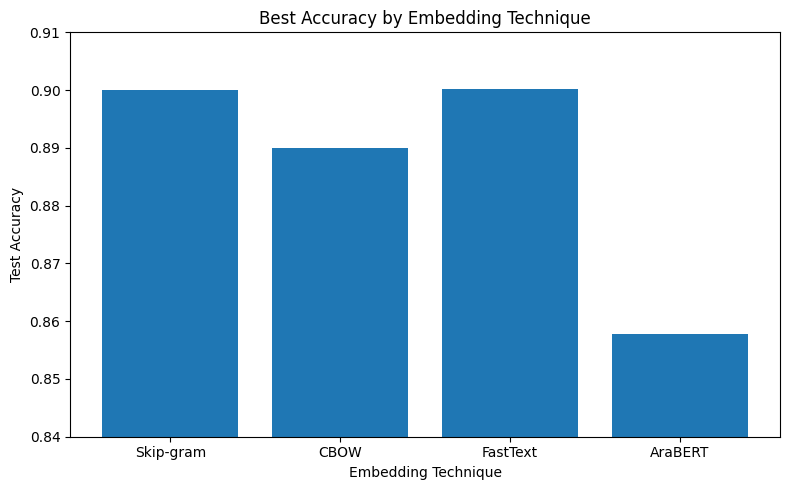

In [1]:
import matplotlib.pyplot as plt

embeddings = ['Skip-gram', 'CBOW', 'FastText', 'AraBERT']
accuracies = [0.90, 0.89, 0.9002, 0.8578]

plt.figure(figsize=(8, 5))
bars = plt.bar(embeddings, accuracies)
plt.title('Best Accuracy by Embedding Technique')
plt.xlabel('Embedding Technique')
plt.ylabel('Test Accuracy')
plt.ylim(0.84, 0.91)



plt.tight_layout()
plt.show()


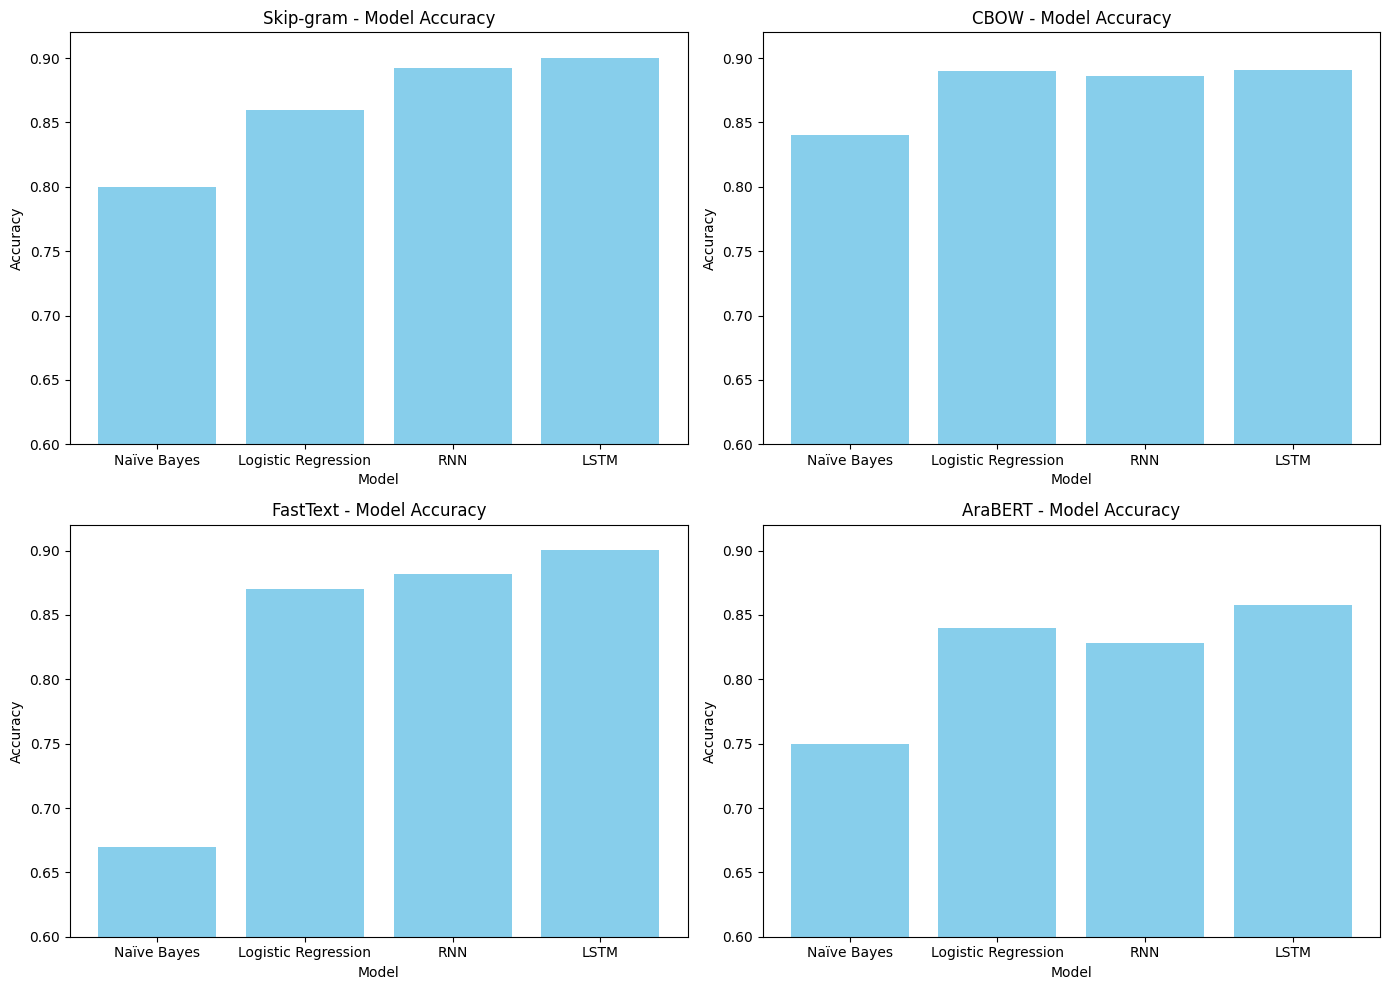

In [7]:
import matplotlib.pyplot as plt

embedding_models = {
    'Skip-gram': {
        'Naïve Bayes': 0.80,
        'Logistic Regression': 0.86,
        'RNN': 0.892,
        'LSTM': 0.90
    },
    'CBOW': {
        'Naïve Bayes': 0.84,
        'Logistic Regression': 0.89,
        'RNN': 0.886,
        'LSTM': 0.8904
    },
    'FastText': {
        'Naïve Bayes': 0.67,
        'Logistic Regression': 0.87,
        'RNN': 0.8818,
        'LSTM': 0.9002
    },
    'AraBERT': {
        'Naïve Bayes': 0.75,
        'Logistic Regression': 0.84,
        'RNN': 0.8285,
        'LSTM': 0.8578
    }
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (embedding, models) in enumerate(embedding_models.items()):
    ax = axes[i]
    model_names = list(models.keys())
    accuracies = list(models.values())
    bars = ax.bar(model_names, accuracies, color='skyblue')
    ax.set_title(f'{embedding} - Model Accuracy')
    ax.set_ylim(0.6, 0.92)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Model')


plt.tight_layout()
plt.show()


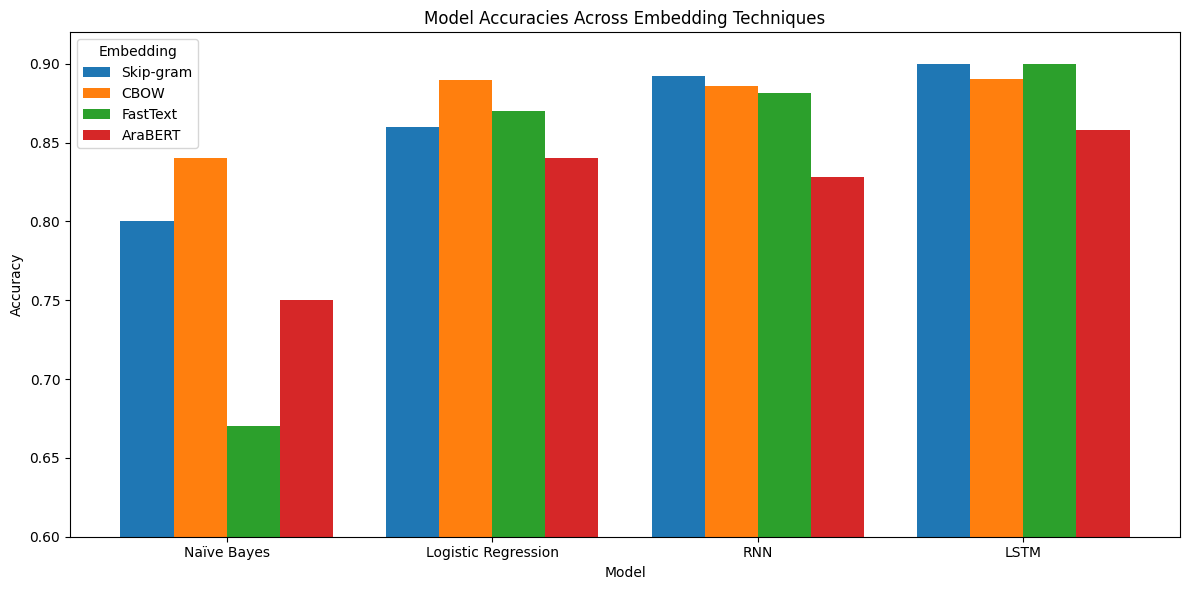

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Naïve Bayes', 'Logistic Regression', 'RNN', 'LSTM']
embedding_accuracies = {
    'Skip-gram': [0.80, 0.86, 0.892, 0.90],
    'CBOW': [0.84, 0.89, 0.886, 0.8904],
    'FastText': [0.67, 0.87, 0.8818, 0.9002],
    'AraBERT': [0.75, 0.84, 0.8285, 0.8578]
}

x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(12, 6))
for i, (embedding, accs) in enumerate(embedding_accuracies.items()):
    plt.bar(x + i * bar_width, accs, width=bar_width, label=embedding)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Across Embedding Techniques')
plt.xticks(x + 1.5 * bar_width, models)
plt.ylim(0.6, 0.92)
plt.legend(title='Embedding')
plt.tight_layout()
plt.show()


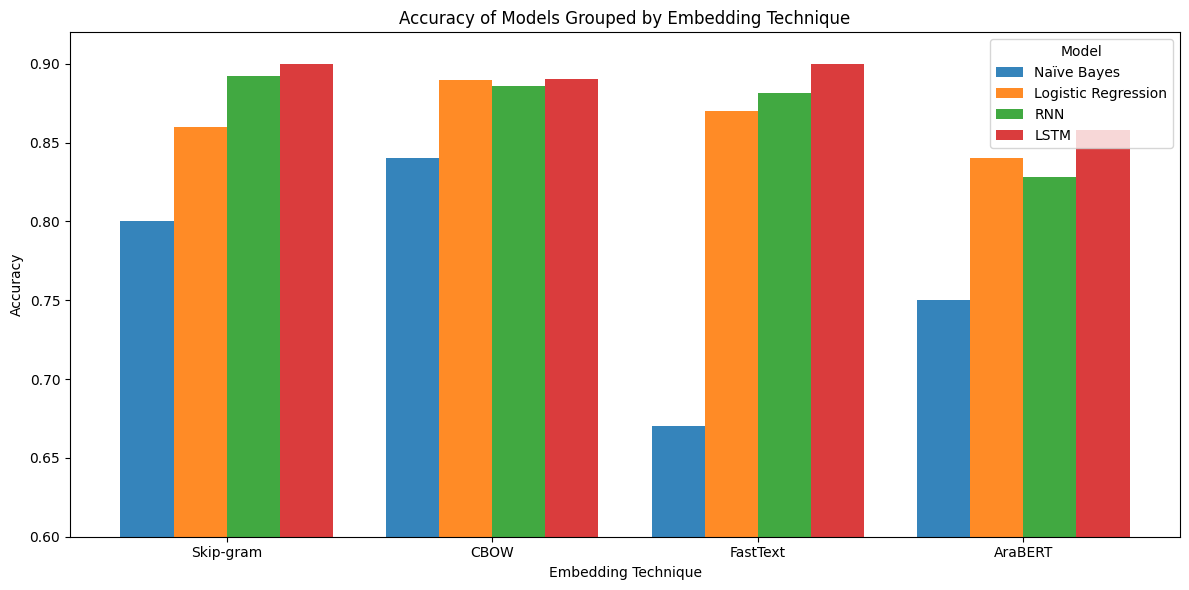

In [12]:
embeddings = ['Skip-gram', 'CBOW', 'FastText', 'AraBERT']
models = ['Naïve Bayes', 'Logistic Regression', 'RNN', 'LSTM']

skipgram = [0.80, 0.86, 0.892, 0.90]
cbow = [0.84, 0.89, 0.886, 0.8904]
fasttext = [0.67, 0.87, 0.8818, 0.9002]
arabert = [0.75, 0.84, 0.8285, 0.8578]

embedding_accuracies = [skipgram, cbow, fasttext, arabert]

x = np.arange(len(embeddings))
bar_width = 0.2

plt.figure(figsize=(12, 6))
colors = ['steelblue', 'seagreen', 'indianred', 'orange']
for i, model in enumerate(models):
    accs = [embedding_accuracies[j][i] for j in range(len(embeddings))]
    plt.bar(x + i * bar_width, accs, width=bar_width, label=model, alpha=0.9)

plt.xlabel('Embedding Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models Grouped by Embedding Technique')
plt.xticks(x + 1.5 * bar_width, embeddings)
plt.ylim(0.6, 0.92)
plt.legend(title='Model')
plt.tight_layout()
plt.show()
